In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
Y_train = pd.read_csv('../csv&excel/Y_train.csv')
Y_test = pd.read_csv('../csv&excel/Y_test.csv')
X_train = pd.read_csv('../csv&excel/X_train.csv')
X_test = pd.read_csv('../csv&excel/X_test.csv')
# xgboost weight 파라미터
scale_pos_weight_ss = Y_train.value_counts()[0] / Y_train.value_counts()[1]

In [3]:
# 하이퍼파라미터 조정 전
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=100),
        SVC(),
        RandomForestClassifier(max_depth=100),
        XGBClassifier(max_depth=100),
        KNeighborsClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train, Y_train, X_test, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,LogisticRegression(),0.52,0.54,0.56,0.55,0.60,0.60,0.67,0.63
1,DecisionTreeClassifier(max_depth=100),0.52,0.54,0.52,0.53,1.00,1.00,1.00,1.00
2,SVC(),0.52,0.52,0.99,0.68,0.53,0.52,1.00,0.69
3,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.50,0.51,0.54,0.52,1.00,1.00,1.00,1.00
4,"XGBClassifier(base_score=None, booster=None, c...",0.50,0.52,0.52,0.52,1.00,1.00,1.00,1.00
5,KNeighborsClassifier(),0.50,0.51,0.56,0.54,0.73,0.72,0.78,0.75


In [4]:
# 하이퍼파라미터 조정 후
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(C = 5, penalty = 'l2', solver = 'lbfgs', max_iter = 200, multi_class = 'auto'),
        DecisionTreeClassifier(criterion = 'gini', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 16, splitter = 'best'),
        SVC(kernel='linear', gamma='auto', C=0.1, class_weight='balanced'),
        RandomForestClassifier(criterion = 'log_loss', max_depth = 12, max_features = 'log2', max_leaf_nodes = 9, n_estimators = 25 ),
        XGBClassifier(min_child_weight = 1, gamma = 3, subsample = 0.5, colsample_bytree = 0.5, max_depth = 9, learning_rate = 0.2),
        KNeighborsClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train, Y_train, X_test, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,"LogisticRegression(C=5, max_iter=200)",0.52,0.54,0.57,0.55,0.60,0.60,0.68,0.64
1,"DecisionTreeClassifier(max_depth=9, max_featur...",0.52,0.55,0.40,0.46,0.75,0.78,0.72,0.75
2,"SVC(C=0.1, class_weight='balanced', gamma='aut...",0.55,0.56,0.62,0.59,0.58,0.58,0.70,0.63
3,"(DecisionTreeClassifier(criterion='log_loss', ...",0.51,0.52,0.59,0.56,0.71,0.69,0.81,0.74
4,"XGBClassifier(base_score=None, booster=None, c...",0.54,0.55,0.58,0.56,0.91,0.92,0.92,0.92
5,KNeighborsClassifier(),0.50,0.51,0.56,0.54,0.73,0.72,0.78,0.75


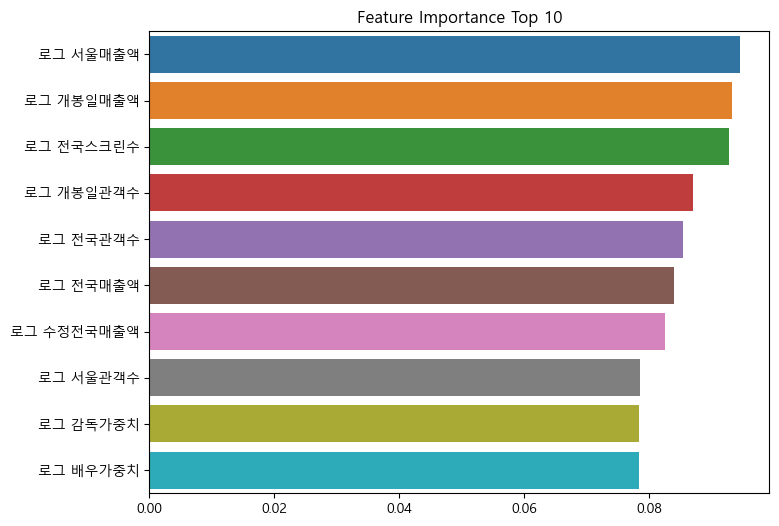

In [5]:
ls = list(X_train.columns)
X_train_2 = X_train[ls]
y_train_2 = Y_train.copy()
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
model = XGBClassifier(max_depth=3)
model.fit(X_train_2, y_train_2)

# 배열형태로 반환
ft_importance_values = model.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_2.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:10]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 10')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()